In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
sns.scatterplot(df['Sum'], df['Days']);

In [ ]:
data = df[['Sum', 'Days']]

n_clusters = list(range(2, 7))
metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(data)
  score = silhouette_score(data, km.labels_)
  metrics.append(score)

In [ ]:
sns.lineplot(n_clusters, metrics);


In [ ]:

print('\n' * 20)

# Видео 2

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv')
df.head()

In [ ]:
sns.scatterplot(df['Sum'], df['Days'], hue=df['Color'])

In [ ]:
features = ['Sum', 'Days']

df_g = df.groupby('Color').agg({x: ['mean', 'std'] for x in features}).T
df_g

In [ ]:
import numpy as np

functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

In [ ]:
cluster_labels = [0, 1, 2]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

In [ ]:
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm')

# Видео 3

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('st900.csv')
df.head()

,Device1_X,Device1_Y,Device2_X,Device2_Y
0,-1.357818,-2.071201,3.51,8.23
1,-0.011177,1.705894,1.15,7.98
2,0.984379,0.236823,0.36,9.50
3,-3.032441,1.158165,0.75,8.45
4,-0.653970,2.226539,0.73,8.27


In [5]:
df.shape

(500, 4)

In [6]:
km = KMeans(n_clusters=4).fit(df)
labels = km.labels_

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df)
data = pd.DataFrame(df_emb)
data

C:\Users\55317\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\55317\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,0,1
0,7.098701,-23.020643
1,6.131431,-29.867599
2,5.618941,-32.203114
3,7.152218,-27.678011
4,6.700319,-29.522274
...,...,...
495,-13.673165,23.972738
496,-5.905037,24.897848
497,-5.345142,24.758867
498,-12.559410,24.575672


C:\Users\55317\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

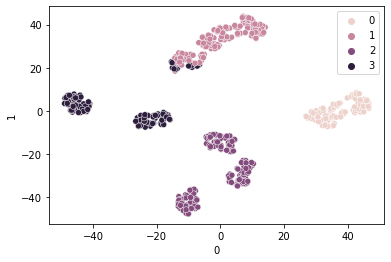

In [8]:
sns.scatterplot(data[0], data[1], hue=labels)